In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
data = fetch_california_housing()

In [11]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
df["Price"] = data.target

In [18]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
199,2.6429,52.0,3.746032,1.15873,415.0,3.293651,37.78,-122.23,0.713


<Axes: >

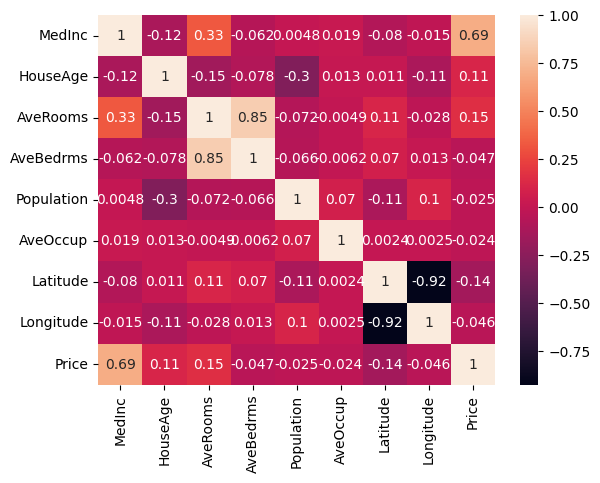

In [21]:
#Heat map
corr = df.corr()
sns.heatmap(corr,annot=True)

<Figure size 400x500 with 0 Axes>

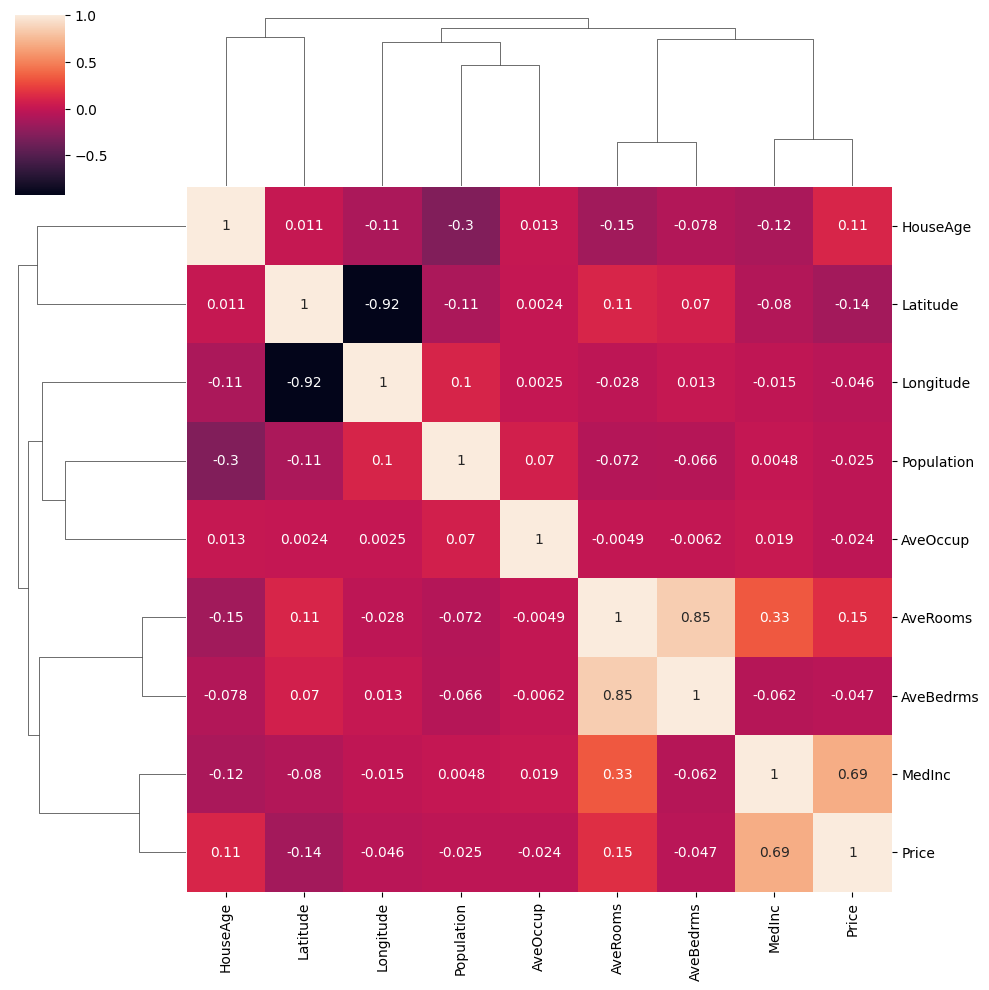

In [22]:
#clustermap table shows group(cluster) relationship

plt.figure(figsize=(4,5))
sns.clustermap(df.corr(),annot=True)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [24]:
VIF = pd.DataFrame()
VIF["Feature"] = df.columns

In [31]:
vif = []
for i in range(len(df.columns)):
    v = variance_inflation_factor(df.values,i)
    vif.append(v)

In [32]:
VIF["V.I.F"] = vif

In [33]:
VIF

,Feature,V.I.F
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [ ]:
#If VIF > 10 drop the features one by one,here highest  is longitude,we will drop this and
#again calculate vif and then drop the highest one

In [35]:
df1 = df.copy()
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [36]:
df1.drop("Longitude",axis=1,inplace=True)

In [37]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [43]:
#Now again check VIF
VIF = pd.DataFrame()
VIF["Feature"] = df1.columns
vif = []
for i in range(len(df1.columns)):
    v = variance_inflation_factor(df1.values,i)
    vif.append(v)

In [44]:
VIF["VIF"] = vif

In [45]:
VIF

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [46]:
#Now drop the avg room column
df1.drop("AveRooms",axis=1,inplace=True)

In [47]:
#Now again check VIF
VIF = pd.DataFrame()
VIF["Feature"] = df1.columns
vif = []
for i in range(len(df1.columns)):
    v = variance_inflation_factor(df1.values,i)
    vif.append(v)

In [48]:
VIF["VIF"] = vif

In [49]:
VIF

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [50]:
#Now drop the Latitude column
df1.drop("Latitude",axis=1,inplace=True)

In [51]:
VIF = pd.DataFrame()
VIF["Feature"] = df1.columns
vif = []
for i in range(len(df1.columns)):
    v = variance_inflation_factor(df1.values,i)
    vif.append(v)

In [52]:
VIF["VIF"] = vif

In [53]:
VIF

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [54]:
#Now all the features vif is below the 10, so now we can build the model


In [55]:
df1

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [56]:
x = df1.drop("Price",axis=1)
y = df1["Price"]

In [57]:
x,y

(       MedInc  HouseAge  AveBedrms  Population  AveOccup
 0      8.3252      41.0   1.023810       322.0  2.555556
 1      8.3014      21.0   0.971880      2401.0  2.109842
 2      7.2574      52.0   1.073446       496.0  2.802260
 3      5.6431      52.0   1.073059       558.0  2.547945
 4      3.8462      52.0   1.081081       565.0  2.181467
 ...       ...       ...        ...         ...       ...
 20635  1.5603      25.0   1.133333       845.0  2.560606
 20636  2.5568      18.0   1.315789       356.0  3.122807
 20637  1.7000      17.0   1.120092      1007.0  2.325635
 20638  1.8672      18.0   1.171920       741.0  2.123209
 20639  2.3886      16.0   1.162264      1387.0  2.616981
 
 [20640 rows x 5 columns],
 0        4.526
 1        3.585
 2        3.521
 3        3.413
 4        3.422
          ...  
 20635    0.781
 20636    0.771
 20637    0.923
 20638    0.847
 20639    0.894
 Name: Price, Length: 20640, dtype: float64)

In [62]:
#Split the data set into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [63]:
x_train.shape,x_test.shape

((16512, 5), (4128, 5))

In [73]:
#Train the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [78]:
model.coef_

array([ 4.32236260e-01,  1.88513745e-02,  6.86201797e-02,  3.64631850e-05,
       -5.10050980e-03])

In [75]:
model.fit(x_train,y_train)

LinearRegression()

In [79]:
y_pred = model.predict(x_test)

In [80]:
y_pred

array([1.9256999 , 1.20179335, 2.21977623, ..., 1.84078863, 1.54848032,
       3.072567  ])

In [82]:
#Performance matrics
from sklearn.metrics import mean_absolute_error,r2_score,adj
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.5985717834733706
0.5289393139319991


In [83]:
#If number of features is 1000 then we use 
x = df.iloc[:,:-1]
y = df["Price"]

In [84]:
x.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [86]:
from sklearn.feature_selection import RFE

In [88]:
rfe = RFE(LinearRegression(),n_features_to_select=5)

In [89]:
rfe

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [90]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [91]:
rfe.support_

array([ True, False,  True,  True, False, False,  True,  True])

In [96]:
ypred = rfe.predict(x)

In [95]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [ ]:
sns.scatterplot()